In [18]:
import pandas as pd
import matplotlib.pyplot as plt


In [19]:

chrome_edges = 0

ipcrafter_chrome_coverage = None
ipcrafter_chrome_exec_time = 4.0

seconds_per_hour = 3600

with open('ipcrafter_chrome_browser_coverage.csv', 'r') as f:
    ipcrafter_chrome_coverage = pd.read_csv(f, header=None)
    chrome_edges = ipcrafter_chrome_coverage.iloc[0,1]

    ipcrafter_chrome_coverage.columns = ['input', 'browser_coverage']
    ipcrafter_chrome_coverage.drop(ipcrafter_chrome_coverage.index[0], inplace=True)

with open('ipcrafter_chrome_all_coverage.csv', 'r') as f:
    ipcrafter_chrome_all_coverage = pd.read_csv(f, header=None)
    ipcrafter_chrome_all_coverage.columns = ['input', 'all_coverage']
    ipcrafter_chrome_all_coverage.drop(ipcrafter_chrome_all_coverage.index[0], inplace=True)
    ipcrafter_chrome_coverage = pd.concat([ipcrafter_chrome_coverage, ipcrafter_chrome_all_coverage['all_coverage']], axis=1)

ipcrafter_chrome_coverage['input'] = ipcrafter_chrome_coverage['input'].astype(float).apply(lambda x: x*ipcrafter_chrome_exec_time / seconds_per_hour)
ipcrafter_chrome_coverage.rename(columns={'input': 'time'}, inplace=True)

ipcrafter_chrome_coverage = ipcrafter_chrome_coverage[ipcrafter_chrome_coverage['time'] <= 24]

ipcrafter_chrome_coverage['browser_coverage'] = ipcrafter_chrome_coverage['browser_coverage'].astype(float).apply(lambda x: x/chrome_edges)
ipcrafter_chrome_coverage['all_coverage'] = ipcrafter_chrome_coverage['all_coverage'].astype(float).apply(lambda x: x/chrome_edges)



print(ipcrafter_chrome_coverage)




            time  browser_coverage  all_coverage
1       0.000000          0.000000      0.000000
2       0.001111          0.011975      0.028337
3       0.002222          0.014058      0.033019
4       0.003333          0.014065      0.033215
5       0.004444          0.014312      0.034981
...          ...               ...           ...
21597  23.995556          0.018135      0.064545
21598  23.996667          0.018135      0.064545
21599  23.997778          0.018135      0.064545
21600  23.998889          0.018135      0.064545
21601  24.000000          0.018135      0.064545

[21601 rows x 3 columns]


In [20]:
fuzzorigin_chrome_coverage = None
fuzzorigin_chrome_exec_time = 7.5


with open('fuzzorigin_chrome_browser_coverage.csv', 'r') as f:
    fuzzorigin_chrome_coverage = pd.read_csv(f, header=None)

    fuzzorigin_chrome_coverage.columns = ['input', 'browser_coverage']
    fuzzorigin_chrome_coverage.drop(fuzzorigin_chrome_coverage.index[0], inplace=True)

with open('fuzzorigin_chrome_all_coverage.csv', 'r') as f:
    df = pd.read_csv(f, header=None)
    df.columns = ['input', 'all_coverage']
    df.drop(df.index[0], inplace=True)
    fuzzorigin_chrome_coverage = pd.concat([fuzzorigin_chrome_coverage, df['all_coverage']], axis=1)

fuzzorigin_chrome_coverage['input'] = fuzzorigin_chrome_coverage['input'].astype(float).apply(lambda x: x*fuzzorigin_chrome_exec_time / seconds_per_hour)
fuzzorigin_chrome_coverage.rename(columns={'input': 'time'}, inplace=True)

fuzzorigin_chrome_coverage = fuzzorigin_chrome_coverage[fuzzorigin_chrome_coverage['time'] <= 24]

fuzzorigin_chrome_coverage['browser_coverage'] = fuzzorigin_chrome_coverage['browser_coverage'].astype(float).apply(lambda x: x/chrome_edges)
fuzzorigin_chrome_coverage['all_coverage'] = fuzzorigin_chrome_coverage['all_coverage'].astype(float).apply(lambda x: x/chrome_edges)

print(fuzzorigin_chrome_coverage)

            time  browser_coverage  all_coverage
1       0.000000          0.000000      0.000000
2       0.002083          0.010764      0.033092
3       0.004167          0.011094      0.037585
4       0.006250          0.011268      0.038683
5       0.008333          0.011335      0.040579
...          ...               ...           ...
11517  23.991667          0.014694      0.065502
11518  23.993750          0.014694      0.065502
11519  23.995833          0.014694      0.065502
11520  23.997917          0.014694      0.065502
11521  24.000000          0.014694      0.065502

[11521 rows x 3 columns]


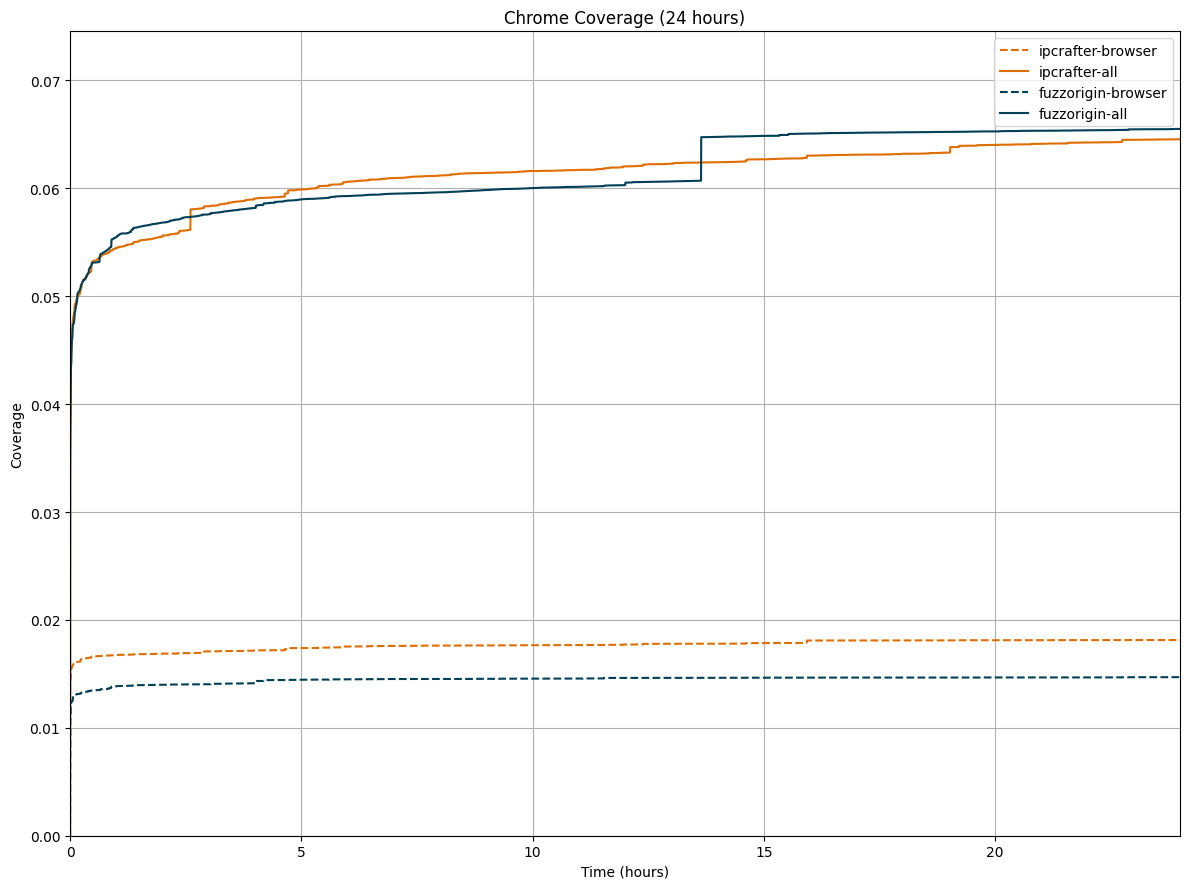

In [ ]:
# Create a plot
plt.figure(figsize=(12, 9))

orange = (225/256, 109/256, 0)
blue = (0, 63/256, 87/256)

# Plotting the two coverage metrics
plt.plot(ipcrafter_chrome_coverage['time'], ipcrafter_chrome_coverage['browser_coverage'], label='ipcrafter-browser', color=orange, linestyle='--', linewidth=3)
plt.plot(ipcrafter_chrome_coverage['time'], ipcrafter_chrome_coverage['all_coverage'], label='ipcrafter-all', color=orange, linewidth=3)

plt.plot(fuzzorigin_chrome_coverage['time'], fuzzorigin_chrome_coverage['browser_coverage'], label='fuzzorigin-browser', color=blue, linestyle='--', linewidth=3)
plt.plot(fuzzorigin_chrome_coverage['time'], fuzzorigin_chrome_coverage['all_coverage'], label='fuzzorigin-all', color=blue, linewidth=3)

# Adding titles and labels
plt.title('Chrome Coverage (24 hours)')
plt.xlabel('Time (hours)')
plt.ylabel('Coverage')
# plt.axvline(x=24, color='red', linestyle='--', label='24 seconds Mark')  # Optional line for 24 seconds
plt.legend()
plt.grid()
plt.xlim(0, 24)  # Limit x-axis to 24 seconds
plt.ylim(0, ipcrafter_chrome_coverage[['browser_coverage', 'all_coverage']].max().max() + 0.01)  # Adjust y-axis for visibility
plt.tight_layout()  # Adjust layout to prevent clipping of titles/labels
plt.show()